<a href="https://colab.research.google.com/github/DSabarish/Understanding_Stats/blob/main/Confidence_Intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Q1: The average time taken for customers to complete a purchase is 4 minutes with a std dev of 1 minute.  

Find the probability that a randomly selected customer will complete a purchase within 6 minutes?  
Assume Gaussian

In [69]:
x = 6
mu = 4
std1 = 1

z=(x-mu)/std1

print("Z Score:",z)
print("Cumulative distribution function (CDF) of a random variable:",norm.cdf(z).round(4))   #norm.cdf(z)

Z Score: 2.0
Cumulative distribution function (CDF) of a random variable: 0.9772


## Q2: Average body temperature has a mean of 98.6°F and a standard deviation of 0.5°F.  
What is the probability that a randomly chosen patient has a body temperature higher than 99.5°F?  

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm

## What is the probability that the average time of the next 5 customers is less than 6 minutes?    


In [71]:
z = (6-4) / (1 / np.sqrt(5))
z

4.47213595499958

In [72]:
norm.cdf(z)

0.9999961278917845

## Height Example

Q: The mean height of a sample of 100 adults was found to be 65 inches, with a standard deviation of 2.5 inches.  

In [73]:
z1 = norm.ppf(0.025)
z1

-1.9599639845400545

In [74]:
z2 = norm.ppf(0.975)
z2

1.959963984540054

In [75]:
## std dev of the sample mean: std error
std_error = 2.5 / np.sqrt(100)
std_error

0.25

In [76]:
x1 = 65 + z1 * std_error
x1

64.51000900386498

In [77]:
x2 = 65 + z2 * std_error
x2

65.48999099613502

## The sample mean recovery time of 100 patients after taking a drug was seen to be 10.5 days with a standard deviation of 2 days    
Find the 95% confidence interval of the true mean.

In [78]:
std_error = 2 / np.sqrt(100)
std_error

0.2

In [79]:
z1 = norm.ppf(0.025)
x1 = 10.5 + z1*std_error
x1

10.108007203091988

In [80]:
z2 = norm.ppf(0.975)
x2 = 10.5 + z2*std_error
x2

10.89199279690801

The mean Youtube watch time of a sample of 100 students was found to be 3.5 hours,  
with a standard deviation of 1 hour.   
Construct a 90% confidence interval for the true watch time.  

In [81]:
def calc_CI(mean, std, N, confidence):
    # calculate std_error
    std_error = std / np.sqrt(N)
    print("Standard Error: ", std_error)

    # calculate the remaining fractions
    frac = (1 - (confidence/100)) / 2

    # calculate z1 and z2
    z1 = norm.ppf(frac)
    z2 = norm.ppf(1 - frac)

    # calculate end points
    x1 = mean + (z1 * std_error)
    x2 = mean + (z2 * std_error)

    return x1, x2

In [82]:
calc_CI(3.5, 1, 100, 90)

Standard Error:  0.1


(3.3355146373048528, 3.6644853626951472)

## Confidence Interval using Bootstrap

In [83]:
survey_1 = [35, 36, 33, 37, 34, 35]
np.mean(survey_1)

35.0

In [84]:
survey_2 = [20, 37, 17, 50, 53, 33]
np.mean(survey_2)


35.0

In [85]:
## sampling with replacement
n = 6
bootstrapped_samples = np.random.choice(survey_1, size=n)
np.mean(bootstrapped_samples)

35.0

In [86]:
n = 6
bootstrapped_samples_2 = np.random.choice(survey_2, size=n)
np.mean(bootstrapped_samples_2)

34.833333333333336

In [87]:
bootstrapped_means_survey_1 = []

for reps in range(10000):
    bootstrapped_samples = np.random.choice(survey_1, size=n)
    means = np.mean(bootstrapped_samples)
    bootstrapped_means_survey_1.append(means)

<Axes: ylabel='Count'>

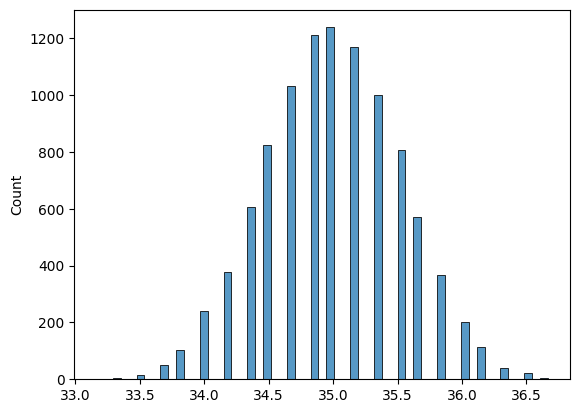

In [88]:
sns.histplot(bootstrapped_means_survey_1)

In [89]:
bootstrapped_means_survey_2 = []

for reps in range(10000):
    bootstrapped_samples = np.random.choice(survey_2, size=n)
    means = np.mean(bootstrapped_samples)
    bootstrapped_means_survey_2.append(means)

<Axes: ylabel='Count'>

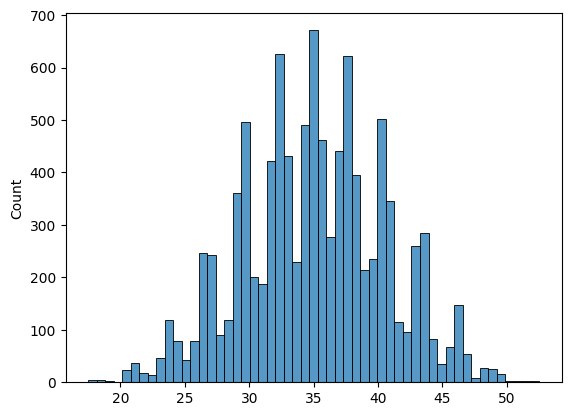

In [90]:
sns.histplot(bootstrapped_means_survey_2)

In [91]:
len(bootstrapped_means_survey_1)

10000

In [92]:
x1 = np.percentile(bootstrapped_means_survey_1, 2.5)
x1

34.0

In [93]:
x2 = np.percentile(bootstrapped_means_survey_1, 97.5)
x2

36.0

95% of the numbers lie between 34 & 36.
confidence interval (34, 36)

In [94]:
x1 = np.percentile(bootstrapped_means_survey_2, 2.5)
x1

24.0

In [95]:
x2 = np.percentile(bootstrapped_means_survey_2, 97.5)
x2

46.0